<a href="https://colab.research.google.com/github/moqri/gene-regulatory-network/blob/master/Yeast_TF_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O expression.zip -nc https://storage.googleapis.com/calico-website-pin-public-bucket/datasets/idea_tall_expression_data.zip
!unzip -n expression.zip

--2020-06-04 14:26:11--  https://storage.googleapis.com/calico-website-pin-public-bucket/datasets/idea_tall_expression_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368238973 (351M) [application/zip]
Saving to: ‘expression.zip’

expression.zip      100%[===================>] 351.18M  46.4MB/s    in 9.7s    

2020-06-04 14:26:21 (36.2 MB/s) - ‘expression.zip’ saved [368238973/368238973]

Archive:  expression.zip
  inflating: idea_tall_expression_data.tsv  
   creating: __MACOSX/
  inflating: __MACOSX/._idea_tall_expression_data.tsv  


In [49]:
import pandas as pd
expression_df=pd.read_table('idea_tall_expression_data.tsv')
expression_df.shape

(10454275, 15)

In [119]:
df=expression_df#[expression_df.GeneName.isin(set(expression_df.TF))]
df.shape

(10454275, 15)

In [120]:
df=df[df.time==45]
df.shape

(1315275, 15)

In [121]:
cols=['TF','GeneName','log2_shrunken_timecourses']
df=df[cols]
df[df.log2_shrunken_timecourses>0]

,TF,GeneName,log2_shrunken_timecourses
22,ACA1,AAD10,0.332777
182,ACA1,ACA1,5.188579
198,ACA1,ACC1,0.410071
614,ACA1,AFR1,0.640908
702,ACA1,AGX1,0.488140
...,...,...,...
10415049,ZNF1,FAT3,0.672468
10441657,ZNF1,TPP1,0.060767
10447113,ZNF1,YFL051C,3.015795
10448905,ZNF1,YJL086C,0.160719


In [122]:
df=df[df.log2_shrunken_timecourses>0]
df = df[df.TF != df.GeneName]
df=df.groupby(['TF','GeneName']).mean().reset_index()
df.sort_values

<bound method DataFrame.sort_values of          TF GeneName  log2_shrunken_timecourses
0      ACA1    AAD10                   0.332777
1      ACA1     ACC1                   0.410071
2      ACA1     AFR1                   0.640908
3      ACA1     AGX1                   0.488140
4      ACA1      AI1                   0.611329
...     ...      ...                        ...
44096  ZAP1     ZRT3                   0.581537
44097  ZNF1     FAT3                   0.672468
44098  ZNF1     TPP1                   0.060767
44099  ZNF1  YFL051C                   3.015795
44100  ZNF1  YJL086C                   0.160719

[44101 rows x 3 columns]>

In [0]:
purturb_dic={}
for TF in set(df.TF):
  purturb_dic[TF]=set(df[df.TF==TF].GeneName)

In [15]:
!wget -O TF_binding.tsv -nc https://raw.githubusercontent.com/moqri/gene-regulatory-network/master/yeast_TF_binding.tsv

--2020-06-04 14:27:39--  https://raw.githubusercontent.com/moqri/gene-regulatory-network/master/yeast_TF_binding.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353637 (345K) [text/plain]
Saving to: ‘TF_binding.tsv’

TF_binding.tsv      100%[===================>] 345.35K  --.-KB/s    in 0.05s   

2020-06-04 14:27:39 (6.19 MB/s) - ‘TF_binding.tsv’ saved [353637/353637]



In [55]:
TF_df=pd.read_table('TF_binding.tsv',sep=';',header=None)
TF_df.shape

(32088, 2)

In [87]:
TF_df.columns=['TF','Gene']
TF_df=TF_df[TF_df.TF!=TF_df.Gene]
TF_df

,TF,Gene
0,RLM1,PST1
1,RLM1,CWP1
2,RLM1,NCW2
3,RLM1,SLT2
4,RLM1,KDX1
...,...,...
32083,YAP3,ASR1
32084,YAP3,RDS3
32085,YAP3,VPS4
32086,RTG2,CIT1


In [88]:
TF_dic={}
for TF in set(TF_df.TF):
  TF_dic[TF]=set(TF_df[TF_df.TF==TF].Gene)
len(TF_dic)  

104

In [0]:
edges=[]
pk=sorted(purturb_dic.keys())
for key in sorted(TF_dic.keys()):
  if key in pk:
    genes=purturb_dic[key]
    for gene in TF_dic[key]:
      if gene in genes:
        edges.append([key,gene])

In [91]:
len(edges)

177

In [0]:
edges_df=pd.DataFrame(edges)
edges_df.to_csv('edges.csv',index=None,header=['source','target'])

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(edges)

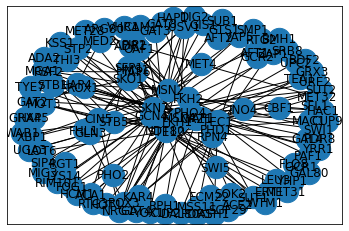

<Figure size 1440x720 with 0 Axes>

In [118]:
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 500)
nx.draw_networkx_edges(G, pos, G.edges, arrows=False)
plt.figure(figsize=(20,10))
plt.show()